In [123]:
import os
from os import path
import re

import numpy as np
import matplotlib.pyplot as plt

dire = '/home/lirfu/Desktop/dr/results_backup'
save_dir = '.ignore'

try:
    os.makedirs(save_dir)
except FileExistsError:
    pass

In [115]:
class9 = path.join(dire, 'noiseless_all_training_9class')
class256 = path.join(dire, 'noiseless_all_training_256class')

exp_name = 'gp_activation_taboo'

In [116]:
def get_dirs(ds):
    dirs = []
    for d in os.listdir(ds):
        if d.startswith(exp_name):
            dirs.append(d)
    return sorted(dirs)

def parse_val(line):
    return float(re.compile(r'[: \t]+').split(line)[1])

def get_vals(ds):
    dirs = get_dirs(ds)
    
    t_acc = []
    t_f1 = []
    for d in dirs:
        p = path.join(ds, d)
        v_acc = []
        v_f1 = []
        for e in os.listdir(p):
            with open(path.join(p, e, 'results.txt')) as f:
                i = 0
                for l in f:
                    if i == 1:
                        v_acc.append(parse_val(l))
                    elif i == 4:
                        v_f1.append(parse_val(l))
                    i+=1
        t_acc.append(v_acc)
        t_f1.append(v_f1)
    return np.array(t_acc), np.array(t_f1)

def boxplot(data, x_t, y_t, limits=(0, 1), name=None):
    plt.figure(figsize=(8,6))
    plt.boxplot(data, notch=False, labels=range(data.shape[1]), widths=.4,
                medianprops = dict(linestyle='-', linewidth=2, color='blue'))
    plt.ylim(limits[0], limits[1])
    plt.xlabel(x_t)
    plt.ylabel(y_t)
    #plt.xticks(range(1,1+data.shape[1]), range(data.shape[1]))
    plt.grid()
    #plt.scatter(range(1,1+data.shape[1]), np.max(data, axis=0), marker='x', color='red')
    #plt.scatter(range(1,1+data.shape[1]), np.min(data, axis=0), marker='.', color='blue')
    if name:
        plt.savefig(path.join(save_dir,name+'.pdf'), bbox_inches = 'tight', pad_inches = 0)
    plt.show()

# 9class

In [117]:
acc, f1 = get_vals(class9)

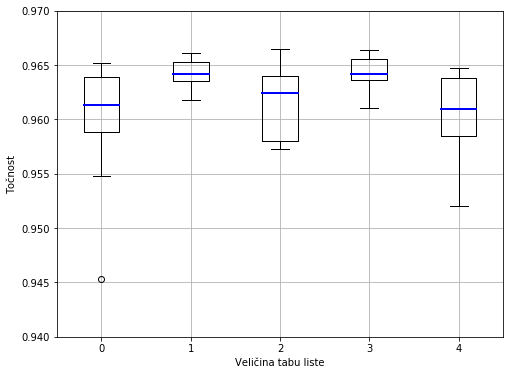

[[0.9547609  0.95935081 0.96400072 0.95863083 0.9652007  0.96403072
  0.96103078 0.96154077 0.96349073 0.94531109]
 [0.96568069 0.96181076 0.96526069 0.96613068 0.96424072 0.96349073
  0.96406072 0.96301074 0.96364073 0.96529069]
 [0.95953081 0.95728085 0.95755085 0.96649067 0.96130077 0.96403072
  0.96439071 0.00446991 0.96349073 0.96391072]
 [0.96586068 0.96640067 0.96439071 0.96370073 0.96106078 0.96397072
  0.9647807  0.96268075 0.96364073 0.96589068]
 [0.95926081 0.95740085 0.95206096 0.96187076 0.96391072 0.96403072
  0.9600408  0.96361073 0.9647507  0.95818084]]


In [118]:
boxplot(acc.T, 'Veličina tabu liste', 'Točnost', limits=(0.94,  0.97), name='GP_9class_acc')
print(acc)

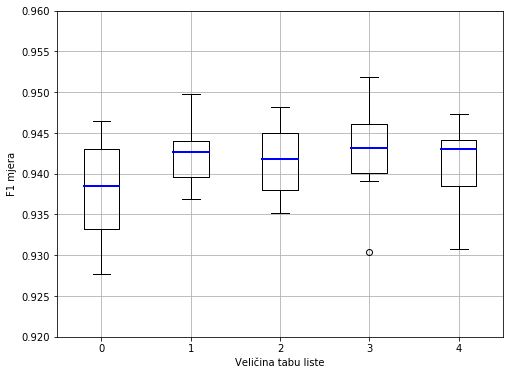

In [119]:
boxplot(f1.T, 'Veličina tabu liste', 'F1 mjera', limits=(0.92,  0.96), name='GP_9class_f1')

# 256class

In [120]:
acc, f1 = get_vals(class256)
print(acc.shape)

(2, 10)


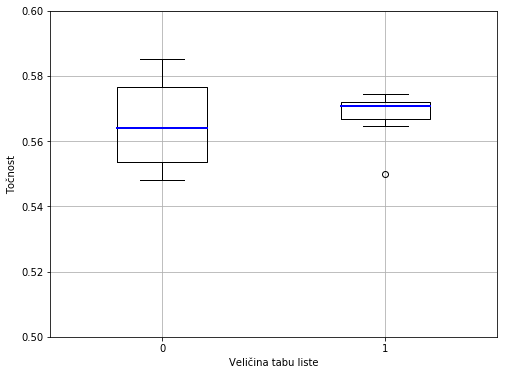

[[0.5848983  0.5851683  0.54820904 0.55720886 0.56704866 0.57319854
  0.55246895 0.55204896 0.57766845 0.56092878]
 [0.57064859 0.56599868 0.549949   0.57358853 0.57433851 0.56962861
  0.57214856 0.57082858 0.57094858 0.56458871]]


In [121]:
boxplot(acc.T, 'Veličina tabu liste', 'Točnost', limits=(0.5, 0.6), name='GP_256class_acc')
print(acc)

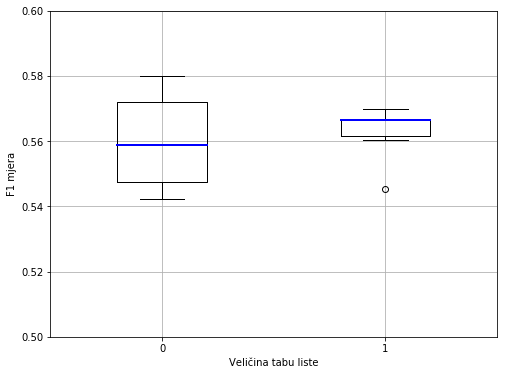

[[0.57891449 0.57986797 0.54218233 0.55034526 0.56149569 0.56832894
  0.54624469 0.54640315 0.57331866 0.55629755]
 [0.56667697 0.56026453 0.54532213 0.56896505 0.56981254 0.5629843
  0.56668277 0.56678278 0.56647173 0.56112815]]


In [122]:
boxplot(f1.T, 'Veličina tabu liste', 'F1 mjera', limits=(0.5, 0.6), name='GP_256class_f1')
print(f1)